# Ajuste de curvas

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/a/a8/Regression_pic_assymetrique.gif" width="400px" height="125px" />

> El **ajuste de curvas** es el proceso de construir una curva (función), que sea el mejor ajuste a una serie de puntos. Las curvas ajustadas pueden ser usadas como asistencia en la visualización de datos, para inferir valores de una función donde no hay datos disponibles, y para resumir la relación entre variables.

**Referencia**:
- https://en.wikipedia.org/wiki/Curve_fitting
___

## 0. Introducción

Consideremos un polinomio de grado uno:

$$y = \beta_1 x + \beta_0.$$

Esta es una **línea recta** que tiene pendiente $\beta_1$. Sabemos que habrá una línea conectando dos puntos cualesquiera. Por tanto, *una ecuación polinómica de primer grado es un ajuste perfecto entre dos puntos*.

Si consideramos ahora un polinomio de segundo grado,

$$y = \beta_2 x^2 + \beta_1 x + \beta_0,$$

este se ajustará exactamente a tres puntos. Si aumentamos el grado de la función a la de un polinomio de tercer grado, obtenemos:

$$y = \beta_3 x^3 + \beta_2 x^2 + \beta_1 x + \beta_0,$$

que se ajustará a cuatro puntos.

**Ejemplos**
1. Encontrar la línea recta que pasa exactamente por los puntos $(3,1)$ y $(2,0)$.
2. Encontrar la parábola que pasa exactamente por los puntos $(0,1)$, $(1,0)$ y $(2,1)$.

**Solución**
1. Consideramos $y=\beta_1 x + \beta_0$. Evaluando en el punto $(3,1)$, obtenemos $\beta_1(3) + \beta_0 = 1$. Ahora, evaluando en el punto $(2,0)$, obtenemos $\beta_1(2) + \beta_0 = 0$. De esta manera,
$$\left[\begin{array}{cc} 1 & 3 \\ 1 & 2\end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1\end{array}\right]=\left[\begin{array}{c} 1 \\ 0\end{array}\right].$$
Resolviendo, $\beta_0=-2, \, \beta_1=1$.

In [1]:
import numpy as np

In [2]:
A=np.array([[1,3],
            [1,2]])
A

array([[1, 3],
       [1, 2]])

In [3]:
b=np.array([1,0])

np.linalg.inv(A)@b # linalg -> paquete de álgebra lineal
                   # inv    -> función inversa
                   # @      -> multiplicación matricial

array([-2.,  1.])

2. Consideramos $y=\beta_2 x^2 + \beta_1 x + \beta_0$. Evaluando en el punto $(0,1)$, obtenemos $\beta_2(0)^2 + \beta_1(0) + \beta_0 = 1$. Ahora, evaluando en el punto $(1,0)$, obtenemos $\beta_2(1)^2 + \beta_1(1) + \beta_0 = 0$. Finalmente, evaluando en el punto $(2,1)$, obtenemos $\beta_2(2)^2 + \beta_1(2) + \beta_0 = 1$. De esta manera,
$$\left[\begin{array}{ccc} 1 & 0 & 0 \\ 1 & 1 & 1 \\ 1 & 2 & 4 \end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \\ \beta_2 \end{array}\right]=\left[\begin{array}{c} 1 \\ 0 \\ 1 \end{array}\right].$$
Resolviendo, $\beta_0=1, \, \beta_1=-2$ y $\beta_2=1$.

In [4]:
A=np.array([[1,0,0],
            [1,1,1],
            [1,2,4]])
b=np.array([1,0,1])
np.linalg.inv(A)@b

array([ 1., -2.,  1.])

### ¿Qué tienen en común los anteriores problemas?
Las curvas están completamente determinadas por los puntos (datos limpios, suficientes y necesarios).

Esto se traduce en que, al llevar el problema a un sistema de ecuaciones lineales, existe una única solución: **no hay necesidad, ni se puede optimizar nada**.

¿Tendremos datos así de **'*bonitos*'** en la vida real?

La realidad es que los datos que encontraremos en nuestra vida profesional se parecen más a esto...

### ¿Cómo ajustamos una curva a esto?

## 1. Problema básico

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg" width="800px" height="250px" />

Consideramos que tenemos un conjunto de n pares ordenados de datos $(x_i,y_i)$, para $i=1,2,3,\dots,n$.

### ¿Cuál es la recta que mejor se ajusta a estos datos?
Consideramos entonces ajustes de la forma $\hat{f}(x) = \beta_0+\beta_1 x = \left[1 \quad x\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \end{array}\right]=\left[1 \quad x\right]\boldsymbol{\beta}$ (lineas rectas).

Para decir '*mejor*', tenemos que definir algún sentido en que una recta se ajuste *mejor* que otra.

**Mínimos cuadrados**: el objetivo es seleccionar los coeficientes $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^\top$, de forma que la función evaluada en los puntos $x_i$ i.e.($\hat{f}(x_i)$) aproxime los valores correspondientes $y_i$.

La formulación por mínimos cuadrados, encuentra los $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$ que minimiza
$$\sum_{i=1}^{n}(y_i-\hat{f}(x_i))^2=\sum_{i=1}^{n}(y_i-\left[1 \quad x_i\right]\boldsymbol{\beta})^2=\left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2,$$

donde $\boldsymbol{y}=\left[y_1,\quad\cdots\quad, y_n\right]^\top$, y $\boldsymbol{X}=\left[\begin{array}{ccc}1 & x_1\\ \vdots & \vdots \\ 1 & x_n\end{array}\right].$ Esto es,

$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2$$

In [5]:
import matplotlib.pyplot as plt

In [ ]:
x=np.random.uniform(-20,60,100)
y=5+0.1*x+np.random.uniform(-3,3,100)

plt.scatter(x,y,s=5) # s -> size
plt.grid()

In [8]:
import scipy.optimize as opt

In [9]:
#opt.minimize?

In [10]:
# Definimos el criterio de optimización (la suma de los errores al cuadrado)
#
def fun(B,x,y):
  f=B[0]+B[1]*x
  return np.sum((f-y)**2)

In [12]:
# Condiciones iniciales
#
B_inicial=np.random.rand(2) # Dos elementos aleatorios
B_inicial

array([0.92635132, 0.60808446])

In [13]:
sol=opt.minimize(fun,B_inicial,args=(x,y))
sol

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 259.90941975118585
        x: [ 4.601e+00  1.184e-01]
      nit: 3
      jac: [ 0.000e+00  0.000e+00]
 hess_inv: [[ 1.066e-02 -2.317e-04]
            [-2.317e-04  9.480e-06]]
     nfev: 18
     njev: 6

In [14]:
fun(sol.x,x,y)

259.90941975118585

O sea que, la función óptima es
$$
f=4.6+0.118x,
$$
donde la suma de los errores al cuadrado es 259.91 (maomeno).

---

In [ ]:
plt.scatter(x,y,s=5)
f=sol.x[0]+sol.x[1]*x
plt.plot(x,f,'r')
plt.grid()

## 2. Ajuste polinomial

Ahora, considere el siguiente conjunto de datos...

In [ ]:
x=np.random.uniform(-np.pi*3/5,np.pi/4*3,100)
x.sort()
y=np.sin(x)+np.random.uniform(-0.3,0.3,100)
plt.scatter(x,y,s=5)
plt.grid()

In [23]:
B_inicial=np.random.rand(2)
sol_1=opt.minimize(fun,B_inicial,args=(x,y))
sol_1

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 8.693367802197892
        x: [-2.182e-02  5.672e-01]
      nit: 2
      jac: [ 2.623e-06  3.457e-06]
 hess_inv: [[ 5.788e-01 -5.954e-01]
            [-5.954e-01  6.188e-01]]
     nfev: 15
     njev: 5

In [ ]:
plt.scatter(x,y,s=5)
f=sol_1.x[0]+sol_1.x[1]*x   # función óptima
plt.plot(x,f,'r')
plt.grid()

In [26]:
# Ajustamos ahora una parabola
#
def fun(B,x,y):
  f=B[0]+B[1]*x+B[2]*x**2      # Cambiamos la función a una parabola
  return np.sum((f-y)**2)

In [27]:
B_inicial

array([0.61048491, 0.53454514])

In [ ]:
B_inicial=np.random.rand(3)       # Pedimios tres valores para B_inicial
sol_2=opt.minimize(fun,B_inicial,args=(x,y))
sol_2

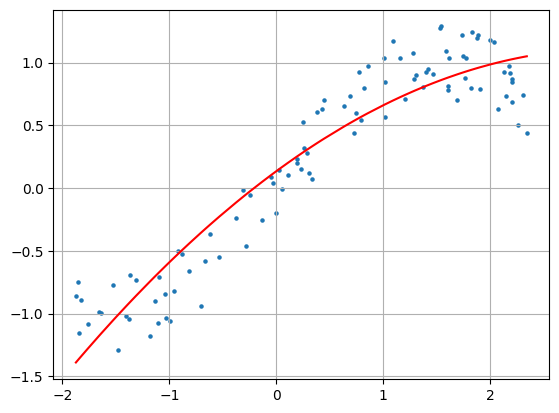

In [30]:
plt.scatter(x,y,s=5)
f=sol_2.x[0]+sol_2.x[1]*x+sol_2.x[2]*x**2
plt.plot(x,f,'r')
plt.grid()

In [31]:
print(B_inicial) # Son tres elementos (polinomio de grado 2)
n=len(B_inicial)
for i in range(n):
  print(i)

[0.1138544  0.08963962 0.36073087]
0
1
2


In [32]:
def fun(B,x,y):
  n=len(B)
  X=np.array([x**i for i in range(n)]) # [x**0, x**1, x**2, ..., x**(n-1)]
  f=np.dot(B,X)
  return np.sum((f-y)**2)

In [33]:
# Polinomio de grado n
#
# n=1


In [34]:
# n=2


In [35]:
# n=3


In [ ]:
# n=1,2,3,4,5


## 3. Regularización

Vimos que la solución de mínimos cuadrados es:
$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2.$$

Sin embargo, si crecemos el orden del modelo hay overfitting y algunos coeficientes óptimos $\boldsymbol{\beta}$ crecen muchísimo. Que un coeficiente sea muy grande, significa que se le da mucha importancia a alguna característica (que quizá sea ruido... no sirve para predecir).

La regularización consiste en penalizar la magnitud de los coeficientes $\boldsymbol{\beta}$ en el problema de optimización, para que no crezcan tanto.

### 3.1. Ridge

$$\boldsymbol{\beta}^{ridge} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|^2$$

### 3.2. Lasso

$$\boldsymbol{\beta}^{lasso} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|_1$$

La norma 1 no es más que la suma de los valores absolutos de las componentes $\left|\left|\boldsymbol{\beta}\right|\right|_1=\sum_{j=0}^m\left|\beta_j\right|$.